In [151]:
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from read_telega_dump import telega_dump_to_pandas
from read_telega_api import extract_message_reactions


tlg_group_id = -1001688539638 
# telegram group id, can be taken from "copy message link"  in desctop telegram

### we can use either of the cells below to load data from dump

In [ ]:
dump_path = r"D:\test_data\ChatExport_2024-03-14\result.json"
df = telega_dump_to_pandas(dump_path=dump_path)
# note: for data, taken from "export chat history", we do not have number of reactions 


In [139]:
tlg_group_id = -1001688539638
file_path = rf'data\chat{tlg_group_id}.parquet.gzip'
df =pd.read_parquet(file_path)
df.shape

(144835, 10)

In [136]:
df.dtypes

is_question                       bool
user_name                       object
msg_text                        object
msg_len                          int64
reply_to_msg_id                float64
react_cnt                        int64
user_id                          int64
msg_id                           int64
msg_date           datetime64[ns, UTC]
msg_month_key                 category
dtype: object

### Overall statistics

In [102]:
df['dummi'] = 1 # there should be less ugly way to get different aggegations without grouping
agg_df = df.groupby('dummi').aggregate({'msg_id':'count','msg_date':['min','max'], 'user_id': 'nunique'}).reset_index()

msgs_cnt = agg_df[( 'msg_id', 'count')][0]
min_date = agg_df[('msg_date', 'min')][0]
max_date = agg_df[('msg_date', 'max')][0]
unique_users =  agg_df[('user_id', 'nunique')][0]
del df['dummi'] 
cols = ["Metric name", "Value"]
dt_format = "%Y-%m-%d"
d_report = [
    {cols[0]: "Number or messages", cols[1]: msgs_cnt},
    {cols[0]: "Date interval", cols[1]: f'from {min_date.strftime(dt_format)} to {max_date.strftime(dt_format)}' },
    {cols[0]: "Users count", cols[1]: unique_users },
    {cols[0]: "Avg messages per day", cols[1]: round(msgs_cnt / (max_date-min_date).days, 1) },
    ]
pd.DataFrame.from_dict(d_report)






C:\Users\Dmitrii_Kalmanovich.EPAM.000\AppData\Local\Temp\ipykernel_4088\184837841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dummi'] = 1 # there should be less ugly way to get different aggegations without grouping
C:\Users\Dmitrii_Kalmanovich.EPAM.000\AppData\Local\Temp\ipykernel_4088\184837841.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  {cols[0]: "Avg messages per day", cols[1]: round(msgs_cnt / (max_date-min_date).days, 1) },


,Metric name,Value
0,Number or messages,51
1,Date interval,from 2024-03-20 to 2024-03-20
2,Users count,16
3,Avg messages per day,inf


### assign date range if you want to restict dataset to some particular period for futher analysis, or just ignore the cell below 

In [125]:
tm_zn = 'Europe/Istanbul'
dt_range = (pd.Timestamp(year=2022, month=2, day=23, tz=tm_zn), pd.Timestamp(datetime.now(), tz=tm_zn))           

df = df[df.msg_date.between(*dt_range)]


### aggregations by date

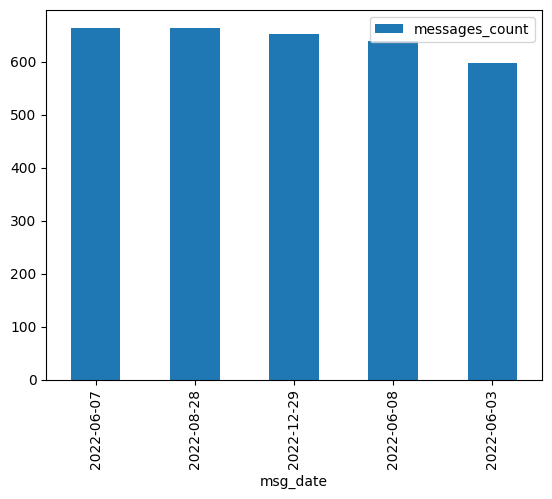

In [158]:
df_aggr = df.groupby(df.msg_date.dt.date).size().sort_values(ascending=False).reset_index(name='messages_count')
df_aggr[0:5].plot(x='msg_date', y='messages_count',kind='bar')
plt.show()

<Axes: >

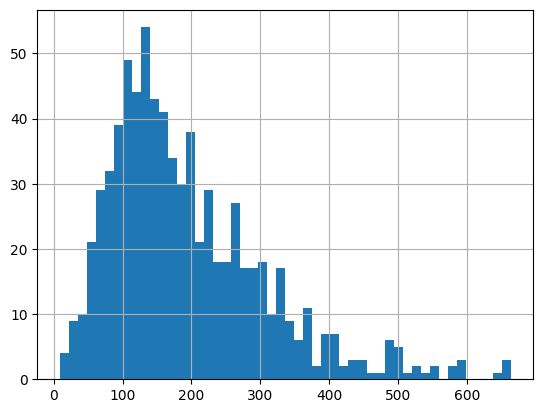

In [168]:
# Visualize the distribution of count of messages per day
df_aggr.messages_count.hist(bins=50)